In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Miray/Desktop")
os.getcwd()

'C:\\Users\\Miray\\Desktop'

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [4]:
odv=pd.read_csv("odev.csv")
df=odv.copy()
df.head()


C:\Users\Miray\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [5]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
df.loc[df[df["ind_420"] == "?"].index] = np.nan 


In [7]:
df["ind_422"] = df["ind_422"].astype('float64')
df["ind_420"] = df["ind_420"].astype('float64')
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [8]:
kat_df=df.select_dtypes(include=["object"])
kat_df.head()

,ind_109
0,GREEN
1,GREEN
2,GREEN
3,GREEN
4,GREEN


In [9]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [10]:
for i in df.select_dtypes(include=["object"]).columns:
    print(i,": ",df[i].value_counts().count())

ind_109 :  2


In [11]:
df.dropna()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19.0,17.0,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54.0,-152.0,-353.0,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24.0,19.0,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60.0,-158.0,-359.0,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30.0,24.0,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60.0,-160.0,-362.0,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37.0,30.0,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65.0,-166.0,-367.0,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41.0,37.0,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86.0,-186.0,-388.0,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
5,45.0,41.0,100.000000,50.000000,50.000000,80.092497,74.144360,18.75,12.74,15.18,...,-78.1,-84.0,-185.0,-386.0,1.000000,0.794403,0.730549,-15.176927,-35.722047,-37.098277
6,49.0,45.0,100.000000,42.857143,57.142857,79.625649,73.412327,15.45,13.52,15.84,...,-71.7,-84.0,-184.0,-386.0,1.000000,0.854144,0.746727,-15.176298,-35.720567,-37.096740
7,51.0,49.0,92.857143,35.714286,57.142857,77.015062,69.155269,11.55,13.86,15.86,...,-69.0,-81.0,-181.0,-383.0,0.432099,0.832974,0.723536,-15.172902,-35.712575,-37.088440
8,52.0,51.0,85.714286,28.571429,57.142857,71.153131,58.458047,9.05,14.02,14.39,...,-62.7,-75.0,-175.0,-377.0,0.000000,0.908407,0.705342,-15.164979,-35.693926,-37.069073
9,49.0,52.0,78.571429,21.428571,57.142857,71.849045,59.819306,8.40,11.26,11.59,...,-64.6,-77.0,-177.0,-379.0,0.000000,0.833898,0.690449,-15.167369,-35.699550,-37.074913


In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().values.any()

False

In [14]:
columns = ['20_target','50_target']
df.drop(columns, inplace=True, axis=1)

In [15]:
df.ind_109.unique()

array(['GREEN', 'RED'], dtype=object)

In [16]:
dms=pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
# X'in alacağı değerlerden kategorikleri ve hedef değişkeni sildik.
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [18]:
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1) #dummy haliyle concat yaparak bağımsız değişken dataframe'i oluşturduk.
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1


In [263]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3588, 133)
y_train (3588,)
X_test (1538, 133)
y_test (1538,)


In [264]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm_model=lm.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lm=lm_model.predict(X_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri


In [265]:
print("Lineer Reg. Test hatası:",np.sqrt(mean_squared_error(y_test,y_pred_lm)))

Lineer Reg. Test hatası: 54.011021781734975


In [266]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca=PCA()

In [267]:
X_reduced_train=pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 1.24758979e+01, -2.87149803e+00,  7.80933390e+00,
        -7.72915979e-01,  1.58913084e+00, -1.05921999e+00,
         1.67311614e+00, -4.68738618e-01, -2.11819061e+00,
        -4.19172827e-01,  2.09195068e+00,  2.84652607e+00,
         3.80602626e+00,  1.36497123e+00,  3.05106633e+00,
        -4.51404320e-02,  1.92323383e-01, -2.83872698e+00,
         1.90018705e+00, -1.03206036e+00, -2.31204997e+00,
         1.76402090e+00,  1.48045211e+00,  3.77045423e-01,
        -3.96374316e-01,  2.06152456e+00, -5.38698385e-01,
        -6.89512123e-01, -2.34693163e+00,  8.58843283e-01,
         1.29940384e+00,  5.75599702e-01, -4.83345209e-01,
         1.28811425e-01, -4.31370910e-01, -2.46935446e-01,
         2.00717964e-01, -3.53083308e-01,  1.44541585e-01,
        -1.44829179e+00,  1.58345997e+00, -4.14297446e-01,
         8.92538162e-01,  1.78236631e-01,  2.01019477e-01,
         1.83925223e+00,  6.98743380e-01,  5.13784828e-01,
         8.60049243e-01, -1.12304506e+00, -5.88885161e-0

In [268]:
pca2=PCA()

In [269]:
X_reduced_test=pca2.fit_transform(scale(X_test))

In [270]:
np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100) 

array([37.11, 49.6 , 55.77, 60.32, 63.8 , 66.75, 69.36, 71.37, 73.15,
       74.83, 76.34, 77.76, 79.12, 80.37, 81.53, 82.59, 83.6 , 84.5 ,
       85.35, 86.19, 86.95, 87.67, 88.34, 88.96, 89.54, 90.1 , 90.64,
       91.13, 91.59, 92.03, 92.45, 92.85, 93.24, 93.59, 93.93, 94.25,
       94.56, 94.85, 95.13, 95.39, 95.65, 95.87, 96.09, 96.31, 96.52,
       96.72, 96.91, 97.07, 97.23, 97.38, 97.52, 97.66, 97.79, 97.91,
       98.03, 98.13, 98.23, 98.33, 98.42, 98.51, 98.59, 98.67, 98.75,
       98.82, 98.89, 98.96, 99.02, 99.08, 99.14, 99.19, 99.24, 99.29,
       99.33, 99.37, 99.41, 99.45, 99.49, 99.52, 99.55, 99.58, 99.61,
       99.64, 99.67, 99.7 , 99.72, 99.74, 99.76, 99.78, 99.8 , 99.82,
       99.84, 99.85, 99.86, 99.87, 99.88, 99.89, 99.9 , 99.91, 99.92,
       99.93, 99.94, 99.95, 99.96, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97, 99.97,
       99.97, 99.97,

([<matplotlib.axis.XTick at 0x1f3e0e40b38>,
 <a list of 133 Text xticklabel objects>)

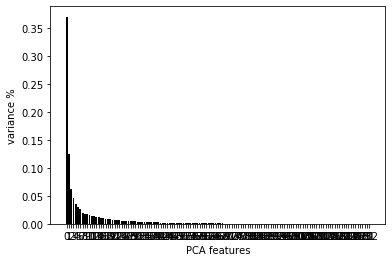

In [271]:
import matplotlib.pyplot as plt
features= range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_,color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [272]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
pcr_model=lm.fit(X_reduced_train,y_train)

In [273]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred=pcr_model.predict(X_reduced_test) #eğitim setinde kurmuş olduğum modeli kullanarak indirgenmiş test seti için tahmin değerleri
np.sqrt(mean_squared_error(y_test,y_pred))

40.48917518968003

In [274]:
from sklearn import model_selection 

In [275]:
cv_10 = model_selection.KFold(n_splits=5,
                             shuffle = False,
                             random_state=1)

In [276]:
lm = LinearRegression()
RMSE=[]
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score= np.sqrt(-1*model_selection.cross_val_score(lm,
                                                     X_reduced_train[:,:i],
                                                     y_train.ravel(),
                                                     cv=cv_10,
                                                     scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

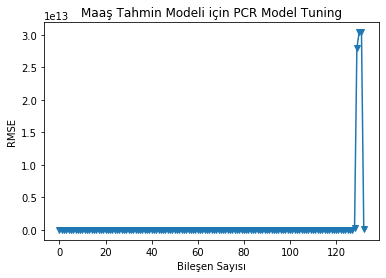

In [277]:
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model Tuning');

In [278]:
for i in range (len(RMSE)):
    if RMSE[i] == min(RMSE):
        print (i)

3


_PCA sonrası 4 değişken ile modeli yeniden fit edip test hatasına bakacağım._

In [279]:
pca_3=PCA()
lm= LinearRegression()
X_reduced_train4=pca_126.fit_transform(scale(X_train))
X_reduced_test4=pca_126.fit_transform(scale(X_test))
pcr_model_=lm.fit(X_reduced_train4[:,0:3],y_train) 
y_pred_train=pcr_model_.predict(X_reduced_train4[:,0:3])
print("Train Hatası:", np.sqrt(mean_squared_error(y_train,y_pred_train))) #train hatası
y_pred_test=pcr_model_.predict(X_reduced_test4[:,0:3])
print("Test Hatası:", np.sqrt(mean_squared_error(y_test,y_pred_test)))      

Train Hatası: 36.68598149510537
Test Hatası: 36.13373566609944


# CART FOR REGRESSİON

In [280]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)

In [281]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3588, 133)
y_train (3588,)
X_test (1538, 133)
y_test (1538,)


In [282]:
cart2 = DecisionTreeRegressor()
cart_model2=cart2.fit(X_train,y_train)

In [283]:
y_pred_cart2 = cart_model2.predict(X_test)
print("Cart test seti hatası:", np.sqrt(mean_squared_error(y_test, y_pred_cart2)))

Cart test seti hatası: 52.92438309194838


CART MODEL TUNING

In [284]:
y=df["90_target"]
X_=df.drop(["ind_109","90_target"],axis=1).astype("float64")
X=pd.concat([X_,dms[["ind_109_GREEN"]]],axis=1)

In [285]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (3588, 133)
y_train (3588,)
X_test (1538, 133)
y_test (1538,)


In [230]:
cart_params = {"min_samples_split": range(50,150),
               "min_samples_leaf": [30,50]}
               
cart_cv_model = GridSearchCV(cart_model2, cart_params, cv=10, n_jobs=-1, verbose=2)
cart_cv_model.fit(X_train, y_train)
print("Cart için en iyi parametre sonuclari:", cart_cv_model.best_params_)


Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  2.9min finished
C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Cart için en iyi parametre sonuclari: {'min_samples_leaf': 50, 'min_samples_split': 149}


In [286]:
cart_tuned = DecisionTreeRegressor(criterion='mse',min_samples_leaf=50, 
                                   
                                   min_samples_split=149)
cart_tuned.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
print("CART Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred)))

CART Test Hatası: 46.672998239391575


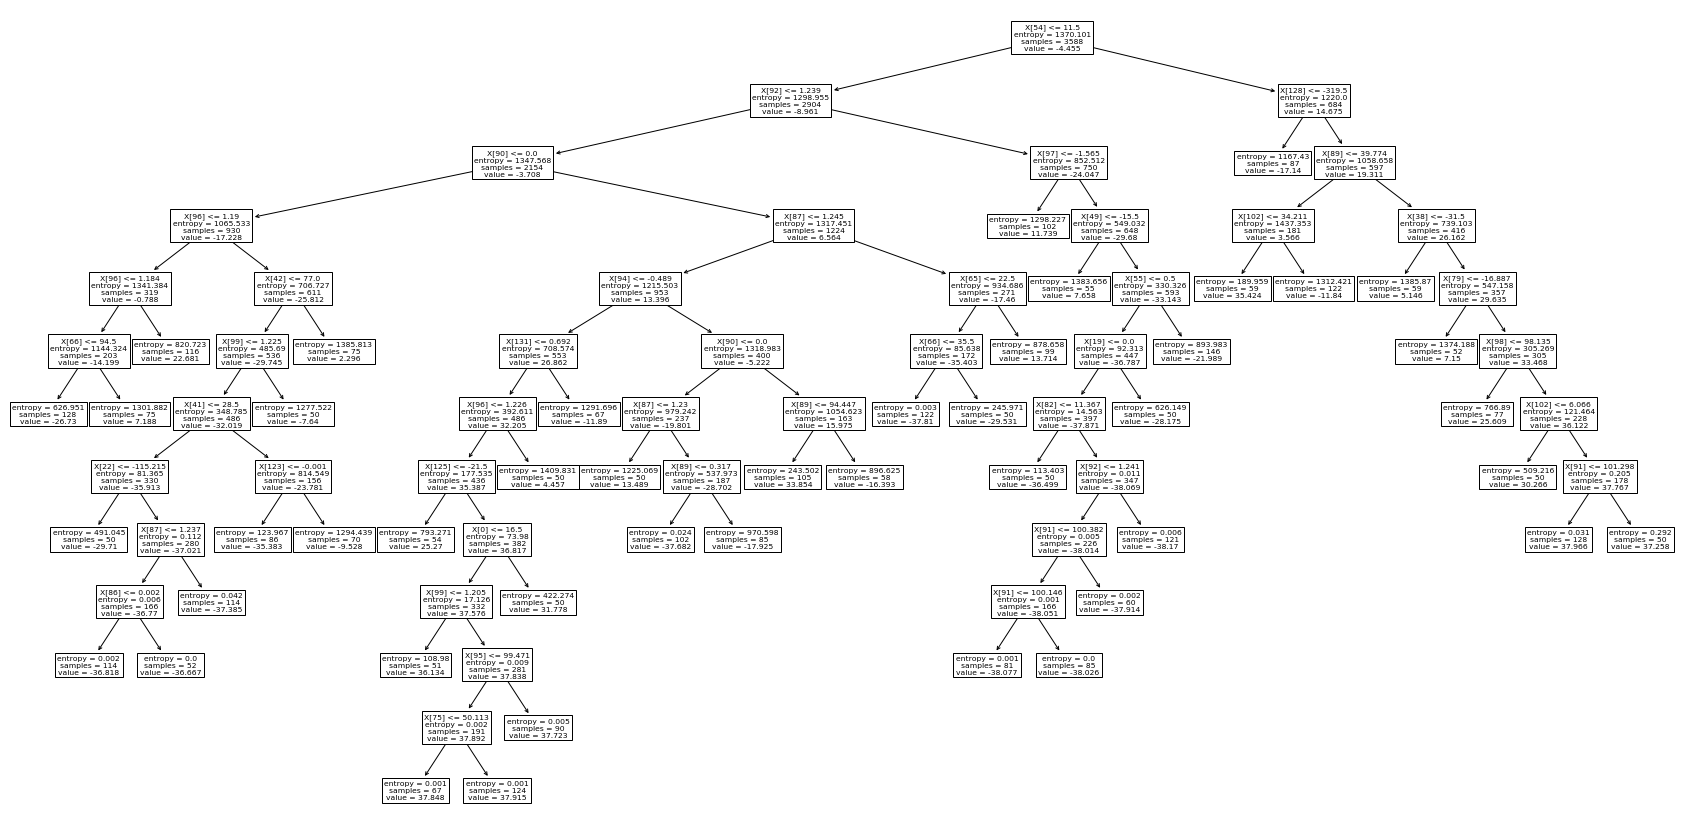

In [258]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# RANDOM FOREST FOR REGRESSİON

In [236]:

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30, random_state=42,shuffle=False)
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
y_pred_r=rfr_model.predict(X_test)
print("Random Forest Test Hatası:", np.sqrt(mean_squared_error(y_test, y_pred_r)))

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Test Hatası: 40.64254961699615


Random Forest Model  Tuning

In [237]:
rfr_params = {"max_depth": list(range(1,10)),
              "max_features": [40,133],
              "n_estimators": [60,100]}

rfr_cv_model = GridSearchCV(rfr_model, 
                           rfr_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rfr_cv_model.fit(X_train, y_train)
print("random forest best  parameters:",rfr_cv_model.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 11.1min finished
C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


random forest best  parameters: {'max_depth': 1, 'max_features': 40, 'n_estimators': 100}


In [238]:
rfr_tuned = RandomForestRegressor(max_depth=1,
                                  max_features=40,
                                  n_estimators=100)
rfr_tuned.fit(X_train, y_train)
y_pred_t = rfr_tuned.predict(X_test)
print("random forest tuning sonrası test hatası:",np.sqrt(mean_squared_error(y_test, y_pred_t)))

random forest tuning sonrası test hatası: 35.24318648883203


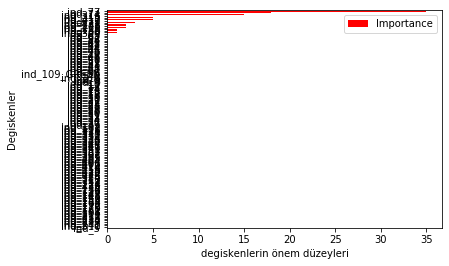

In [239]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},
                          index=X_train.columns)

importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.ylabel("Degiskenler")
plt.xlabel("degiskenlerin önem düzeyleri")
plt.show()


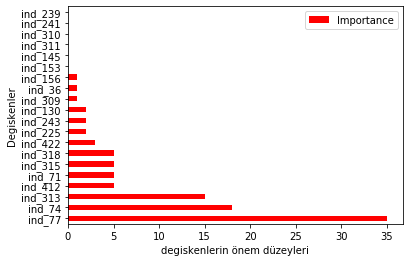

In [240]:
importance = pd.DataFrame({"Importance": rfr_tuned.feature_importances_*100},index=X_train.columns)
importance.sort_values(by= "Importance", axis=0,ascending=False)[0:20].plot(kind="barh",color="r")
plt.ylabel("Degiskenler")
plt.xlabel("degiskenlerin önem düzeyleri")
plt.show()

In [241]:
a = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:3].T.columns)

In [242]:
a

['ind_77', 'ind_74', 'ind_313']

In [243]:
X1=X[a]

In [250]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_ttrain,X_ttest,y_ttrain,y_ttest= train_test_split(X1,y,test_size=0.30, random_state=42,shuffle=False)
print("X_train",X_ttrain.shape)
print("y_train",y_ttrain.shape)
print("X_test",X_ttest.shape)
print("y_test",y_ttest.shape)

X_train (3588, 3)
y_train (3588,)
X_test (1538, 3)
y_test (1538,)


In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_ttrain)
x_train_scaledd = scaler.transform(X_ttrain)

scaler.fit(X_ttest)
x_test_scaledd = scaler.transform(X_ttest)

In [287]:
from sklearn.neural_network import MLPRegressor
mlp_modelk = MLPRegressor(hidden_layer_sizes=(100,20)).fit(x_train_scaledd, y_ttrain)
mlp_modelk

C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [288]:
y_pred_nn = mlp_modelk.predict(x_test_scaledd)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_ttest,y_pred_nn))) #Ysa

Yapay Sinir Ağı Test Hatası: 35.40427975070119


In [256]:
mlp_param = {"alpha": [0.1,0.01,0.02,0.005],
             "hidden_layer_sizes": [(20,20), (100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_modelk, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(x_train_scaledd, y_ttrain)
print("Yapay sinir ağı en iyi parametre değerleri:", mlp_cv_model.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.4min finished
C:\Users\Miray\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Yapay sinir ağı en iyi parametre değerleri: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (300, 200, 150)}


In [289]:
mlp_tuned = MLPRegressor(alpha= 0.1, hidden_layer_sizes=(300,200,150), activation="logistic")
mlp_tuned.fit(x_train_scaledd, y_ttrain)

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [290]:
y_pred = mlp_tuned.predict(x_test_scaledd)
print("Yapay Sinir Ağı Test Hatası:",np.sqrt(mean_squared_error(y_ttest,y_pred)))

Yapay Sinir Ağı Test Hatası: 35.45934159401551
